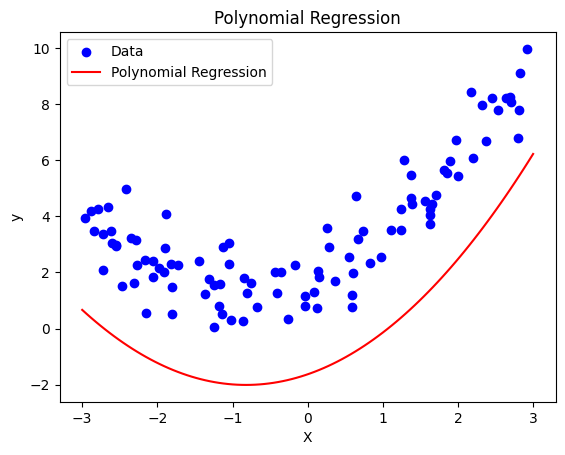

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Random values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Add polynomial features (x, x^2, x^3)
X_poly = np.c_[X, X**2, X**3]

# Standardize features
X_mean = np.mean(X_poly, axis=0)
X_std = np.std(X_poly, axis=0)
X_poly_scaled = (X_poly - X_mean) / X_std

# Gradient Descent for Polynomial Regression
def gradient_descent(X, y, alpha, n_iterations):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Random initialization
    for _ in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
    return theta

# Train the model
alpha = 0.01  # Learning rate
n_iterations = 1000
theta = gradient_descent(X_poly_scaled, y, alpha, n_iterations)

# Generate test data
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
X_test_poly = np.c_[X_test, X_test**2, X_test**3]
X_test_poly_scaled = (X_test_poly - X_mean) / X_std

# Predict
y_pred = X_test_poly_scaled.dot(theta)

# Plot the results
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_test, y_pred, color="red", label="Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()